Should an e-commerce focus on mobile app experiences or website experiences.

In [35]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [36]:
customers = pd.read_csv("ecommerce_client.csv")

In [37]:
customers.head()

,e-mail,address,membership_image,mean_session_length,time_spent_app,time_spent_website,length_of_membership,annual_amount_spent
0,jessica04@christian-riley.com,"338 Graham Loaf Suite 236\nEast Toddton, FM 43...",LemonChiffon,34.497268,12.655651,39.577668,4.082621,587.951054
1,simmonsmartin@hardy.com,"2302 Joshua Park\nMillerbury, WA 30239-8144",MediumVioletRed,31.926272,11.109461,37.268959,2.664034,392.204933
2,michellejohnson@sanders-rodriguez.com,"70562 Gonzalez Stravenue\nElizabethland, WI 40...",Teal,33.000915,11.330278,37.110597,4.104543,487.547505
3,tylerhernandez@barton.info,"7613 Miguel Knoll Suite 762\nWest Katherine, W...",SlateGray,34.305557,13.717514,36.721283,3.120179,581.852344
4,connerjoseph@gmail.com,"981 David Square\nNew Jacquelinetown, AK 66018...",Turquoise,33.330673,12.795189,37.536653,4.446308,599.406092


In [38]:
customers.describe()

,mean_session_length,time_spent_app,time_spent_website,length_of_membership,annual_amount_spent
count,500.000000,500.000000,500.000000,500.000000,500.000000
mean,33.053194,12.052488,37.060445,3.533462,499.314038
std,0.992563,0.994216,1.010489,0.999278,79.314782
min,29.532429,8.508152,33.913847,0.269901,256.670582
25%,32.341822,11.388153,36.349257,2.930450,445.038277
50%,33.082008,11.983231,37.069367,3.533975,498.887875
75%,33.711985,12.753850,37.716432,4.126502,549.313828
max,36.139662,15.126994,40.005182,6.922689,765.518462


In [39]:
customers.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 500 entries, 0 to 499
Data columns (total 8 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   e-mail                500 non-null    object 
 1   address               500 non-null    object 
 2   membership_image      500 non-null    object 
 3   mean_session_length   500 non-null    float64
 4   time_spent_app        500 non-null    float64
 5   time_spent_website    500 non-null    float64
 6   length_of_membership  500 non-null    float64
 7   annual_amount_spent   500 non-null    float64
dtypes: float64(5), object(3)
memory usage: 35.2+ KB


In [40]:
sns.set_palette("GnBu_d")
sns.set_style('whitegrid')

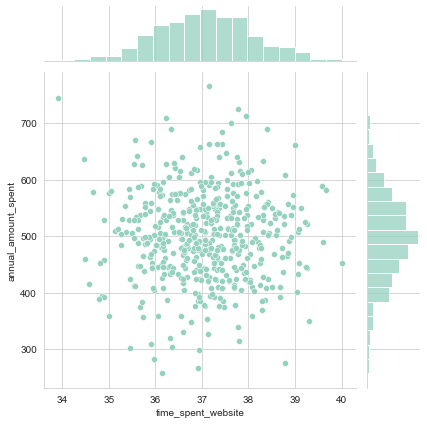

In [41]:
# More time on site, more money spent.
sns.jointplot(x='time_spent_website',y='annual_amount_spent',data=customers)

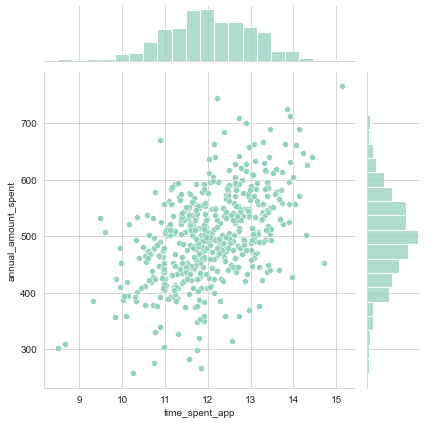

In [43]:
sns.jointplot(x='time_spent_app',y='annual_amount_spent',data=customers)

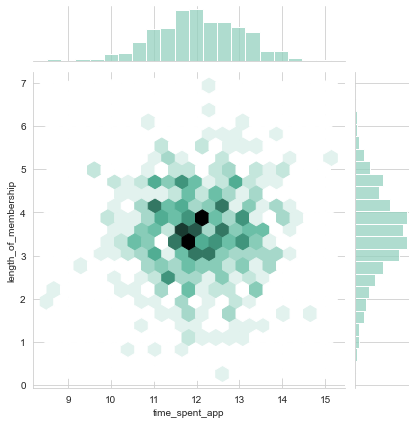

In [44]:
sns.jointplot(x='time_spent_app',y='length_of_membership',kind='hex',data=customers)

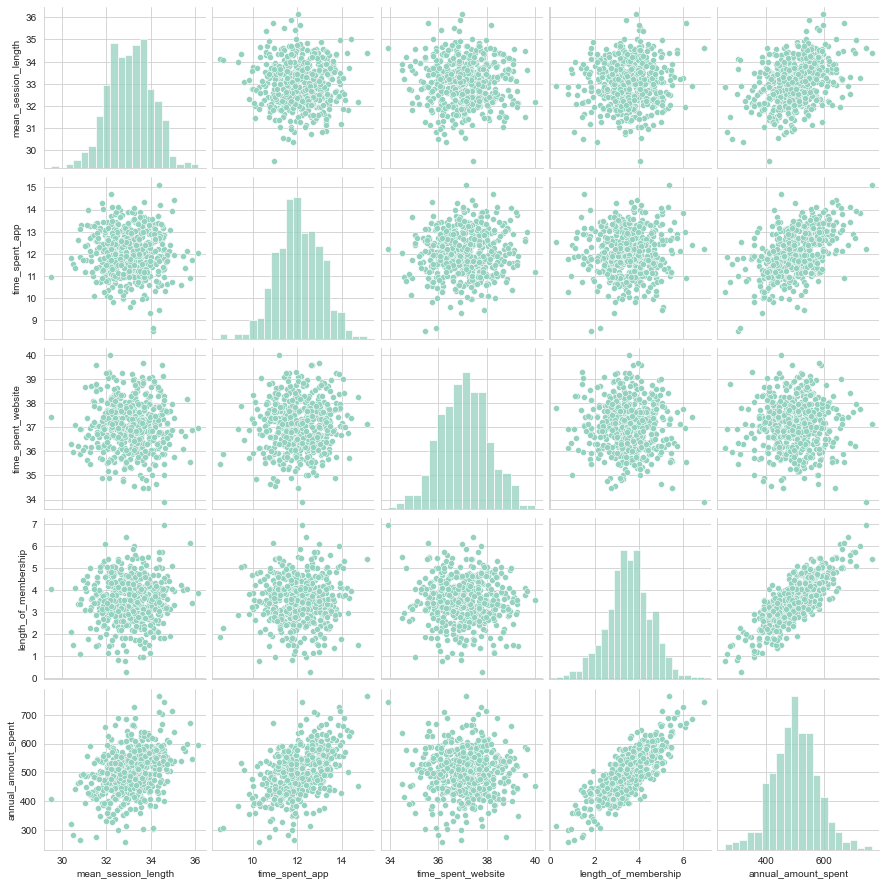

In [45]:
sns.pairplot(customers)

Based off this plot Length of membership looks to be the most correlated feature with Annual Amount Spent

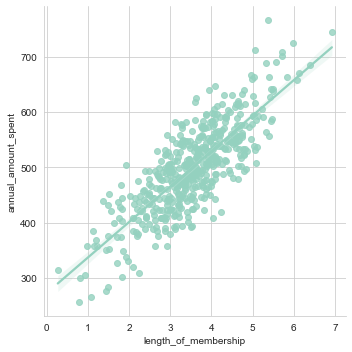

In [46]:
sns.lmplot(x='length_of_membership',y='annual_amount_spent',data=customers)

In [47]:
y = customers['annual_amount_spent']

In [48]:
X = customers[['mean_session_length', 'time_spent_app','time_spent_website', 'length_of_membership']]

In [49]:
from sklearn.model_selection import train_test_split

In [50]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=101)

In [51]:
from sklearn.linear_model import LinearRegression

In [52]:
lm = LinearRegression()

In [53]:
lm.fit(X_train,y_train)

LinearRegression()

In [54]:
print('Coefficients: \n', lm.coef_)

Coefficients: 
 [25.98154972 38.59015875  0.19040528 61.27909654]


In [55]:
predictions = lm.predict( X_test)

Text(0, 0.5, 'Predicted Y')

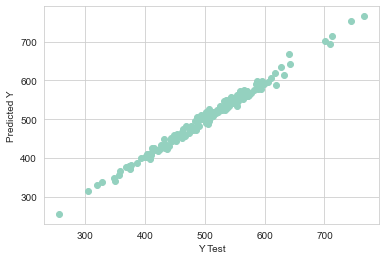

In [56]:
plt.scatter(y_test,predictions)
plt.xlabel('Y Test')
plt.ylabel('Predicted Y')

# Evaluation of the model

In [57]:
from sklearn import metrics

print('MAE:', metrics.mean_absolute_error(y_test, predictions))
print('MSE:', metrics.mean_squared_error(y_test, predictions))
print('RMSE:', np.sqrt(metrics.mean_squared_error(y_test, predictions)))

MAE: 7.228148653430856
MSE: 79.81305165097494
RMSE: 8.933815066978662


In [58]:
metrics.explained_variance_score(y_test, predictions)

0.9890771231889606

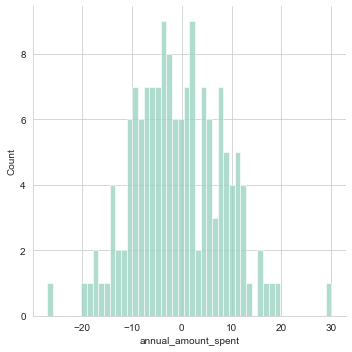

In [60]:
# residuals
sns.displot((y_test-predictions),bins=50);

In [61]:
coeffecients = pd.DataFrame(lm.coef_,X.columns)
coeffecients.columns = ['Coeffecient']
coeffecients

,Coeffecient
mean_session_length,25.981550
time_spent_app,38.590159
time_spent_website,0.190405
length_of_membership,61.279097


Do you think the company should focus more on their mobile app or on their website?

This is tricky, there are two ways to think about this: Develop the Website to catch up to the performance of the mobile app, or develop the app more since that is what is working better. This sort of answer really depends on the other factors going on at the company, you would probably want to explore the relationship between Length of Membership and the App or the Website before coming to a conclusion!